# College Majors

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

In [2]:
import pandas as pd
%matplotlib inline

In [3]:
#read in the data
recent_grads = pd.read_csv('recent-grads.csv')

## first look at the data

In [4]:
#to make sense of the data, lets look at the columns for first row
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [5]:
# first few rows
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [6]:
#some stats
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Interesting to see there is atleast one major for which not a single woman studied

## A bit of cleaning

In [7]:
# Since we are going to plot the data, and null values will not be plotted, lets see how many we have
row_no_want = recent_grads.loc[recent_grads.isnull().any(axis=1),:]

In [8]:
#only one row contains >= 1 null value, FOOD SCIENCE
row_no_want

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [9]:
# the total amount of majors
raw_data_count = len(recent_grads)
raw_data_count

173

In [10]:
#considering only 1 row contains null values, we can simply drop this row 
recent_grads = recent_grads.dropna()

In [11]:
#ensure only 1 row removed 
cleaned_data_count = len(recent_grads)
cleaned_data_count

172

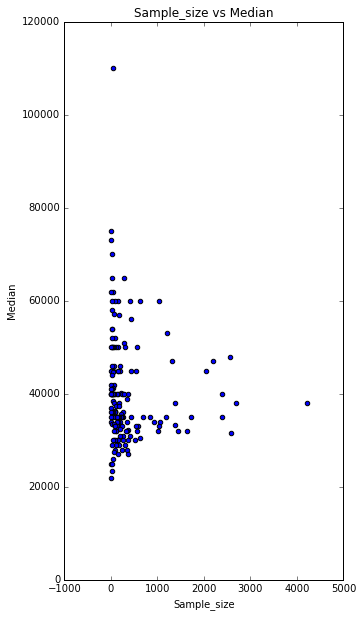

In [12]:
#first plot: 
recent_grads.plot(x='Sample_size', y='Median',kind='scatter'
                 ,title='Sample_size vs Median', figsize=(5,10))

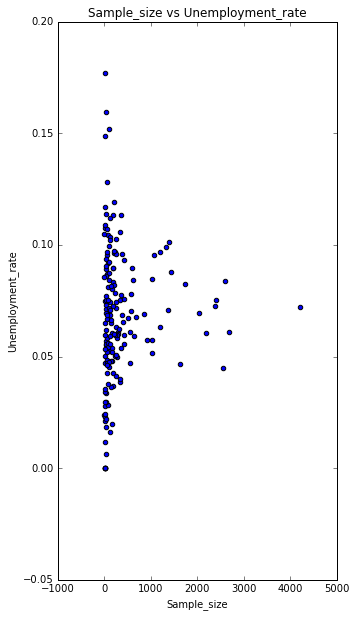

In [13]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample_size vs Unemployment_rate', figsize=(5,10))

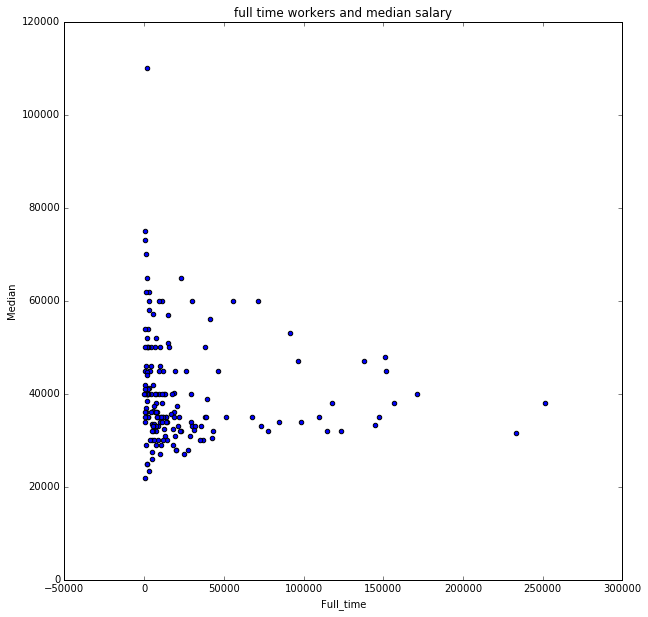

In [14]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', figsize=(10,10),
                 title="full time workers and median salary")

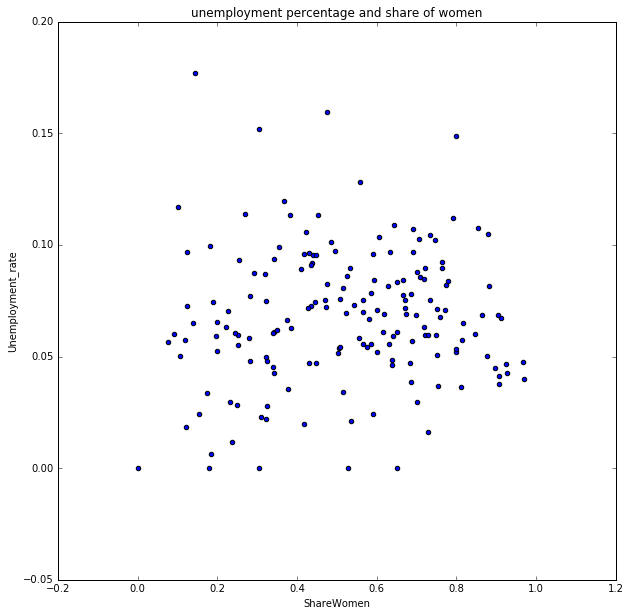

In [15]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', figsize=(10,10),
                 title='unemployment percentage and share of women')

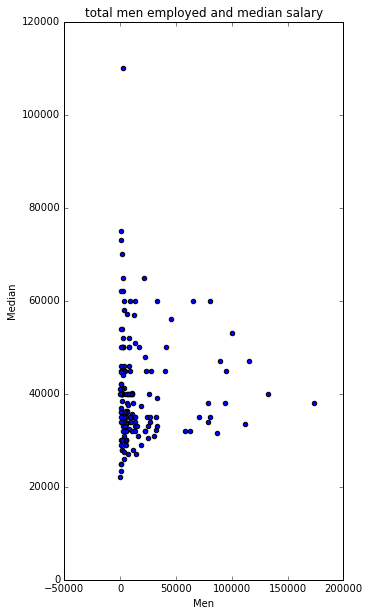

In [16]:
recent_grads.plot(x='Men', y='Median', kind='scatter', figsize=(5,10),
                 title='total men employed and median salary')

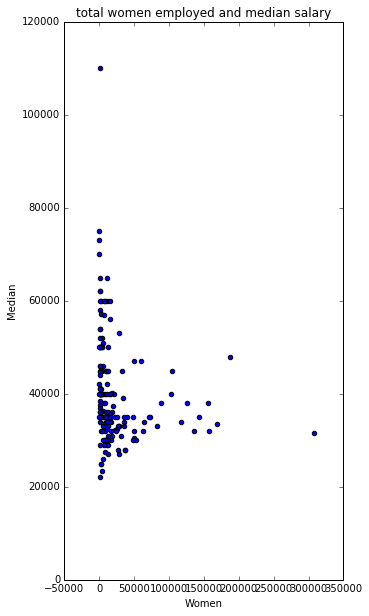

In [17]:
recent_grads.plot(x='Women', y='Median', kind='scatter', figsize=(5,10),
                 title='total women employed and median salary')

## interpreting the graphs

There does overall seem to be a very slight positive correlation in all plots

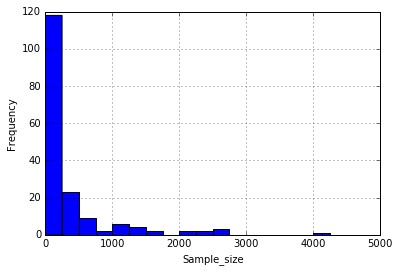

In [21]:
#which sample sizes are the most common
ax = recent_grads['Sample_size'].hist(bins=20, range=(0,5000))
ax.set_xlabel('Sample_size')
ax.set_ylabel('Frequency')

sample sizes of around 250-500 people are the most common

## More graphs

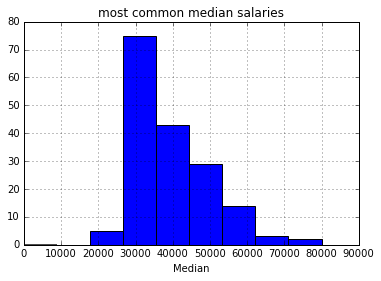

In [24]:
ax2 = recent_grads['Median'].hist(bins=9, range=(0,80000))
ax2.set_xlabel('Median')
ax2.set_title('most common median salaries')

Most common median salary is between 30-40 thousand per annum

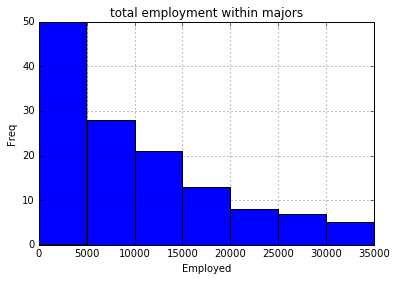

In [27]:
ax3 = recent_grads['Employed'].hist(bins=7, range=(0,35000))
ax3.set_xlabel('Employed')
ax3.set_ylabel('Freq')
ax3.set_title('total employment within majors')


less than 5000 graduates in some kind of employment makes up the most common occurence from our samples of degrees 

In [29]:
#maximum full time workers for any major
maxFull = recent_grads.sort_values(by='Full_time', ascending=False).iloc[0].loc['Full_time']
maxFull

251540

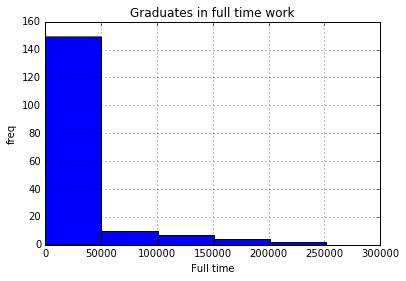

In [33]:
#use maxFull to manipulate xtick quantity
ax4 = recent_grads['Full_time'].hist(bins=(maxFull/50000).astype(int), range=(0,maxFull))
ax4.set_xlabel('Full time')
ax4.set_ylabel('freq')
ax4.set_title('Graduates in full time work')

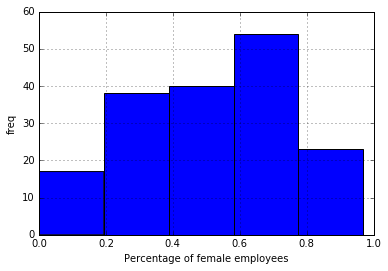

In [36]:
ax5 = recent_grads['ShareWomen'].hist(bins=5)
ax5.set_xlabel('Percentage of female graduates')
ax5.set_ylabel('freq')

Most degrees consist of 40% to ~80% women, there are however quite a few majors in which women are OVER represented and also many in which women are UNDER represented.

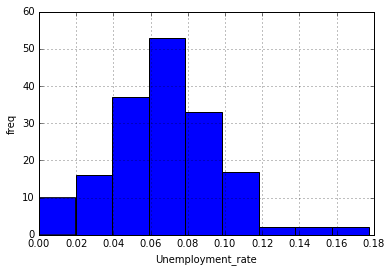

In [42]:
#unemployment rate amongst graduates
ax6 = recent_grads['Unemployment_rate'].hist(bins=9)
ax6.set_xlabel('Unemployment_rate')
ax6.set_ylabel('freq')

employment rates are very good for pretty much all majors

In [45]:
#make use of scatter_matrix to more closely compare different features
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe60869978>,
      dtype=object)

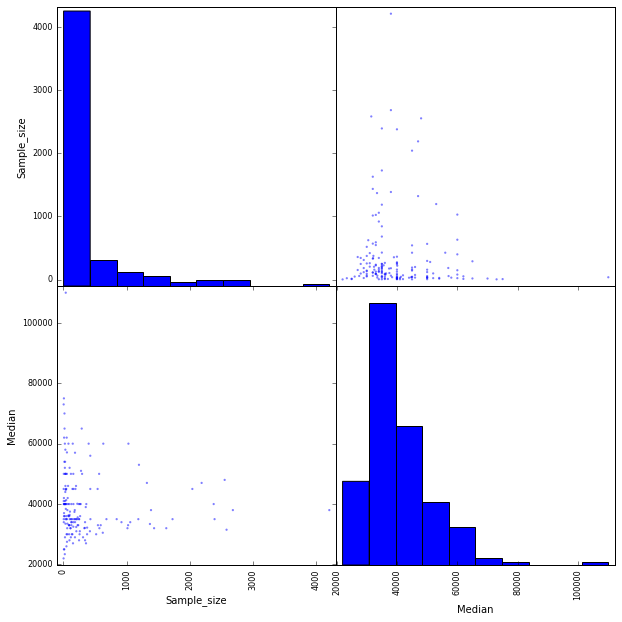

In [39]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

slight positive correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efe604880f0>,
      dtype=object)

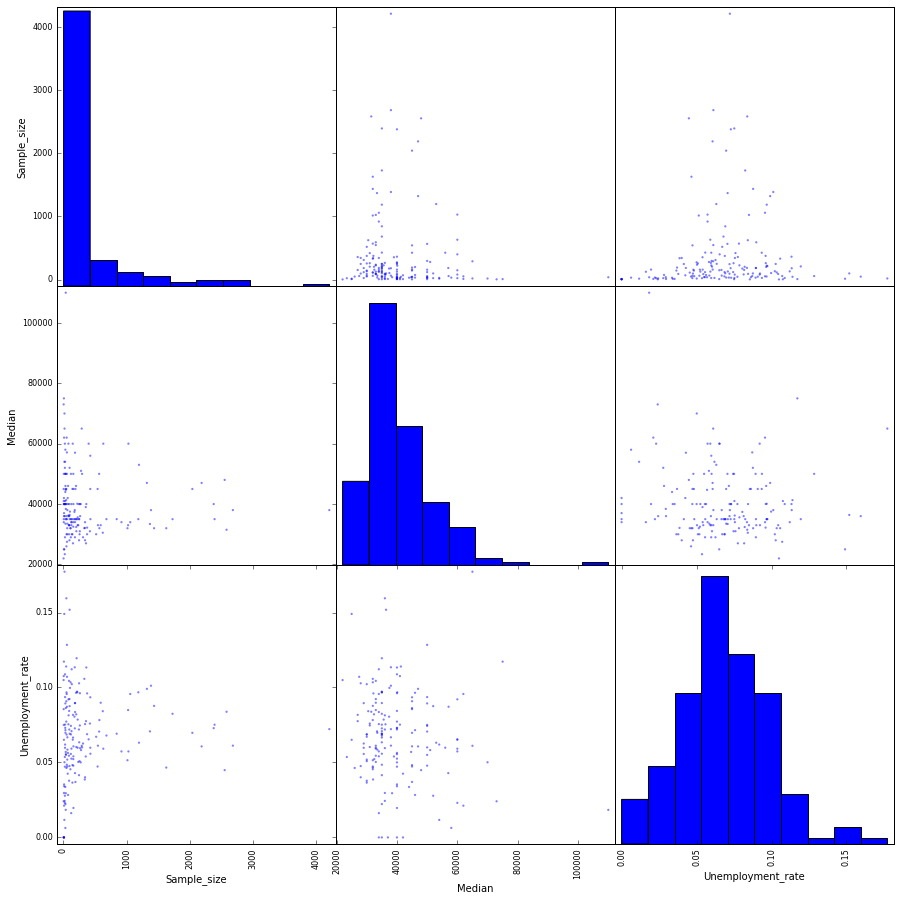

In [44]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,15))

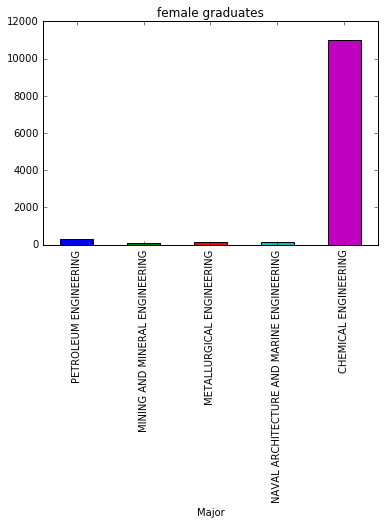

In [61]:
#total female graduates in the last 5(random) majors
recent_grads[:5].plot.bar(x='Major', y='Women',legend=None, title='female graduates')

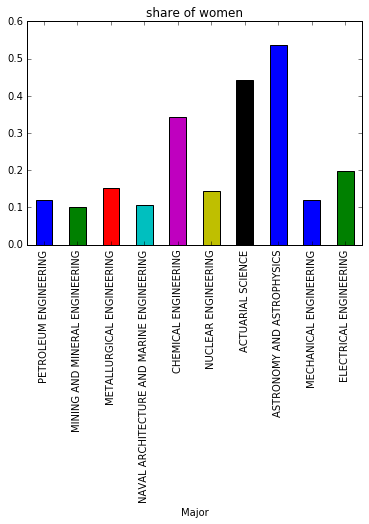

In [60]:
#share of female graduates first10(random) majors 
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=None, title='share of women')

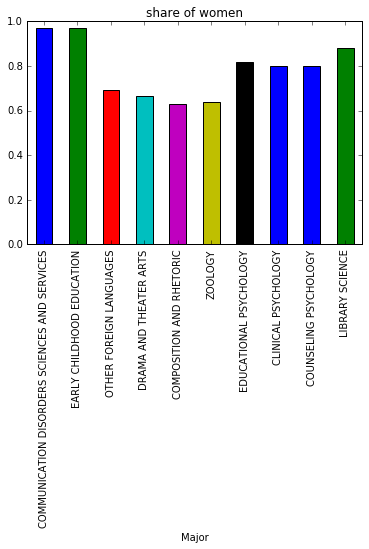

In [59]:
#last 10 majors
recent_grads[-10:].plot.bar(x='Major', y='ShareWomen', legend=None,title='share of women')

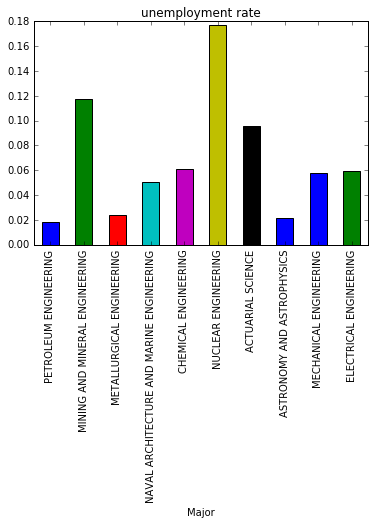

In [58]:
#unemployment rate by major, last 10
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=None, title='unemployment rate')

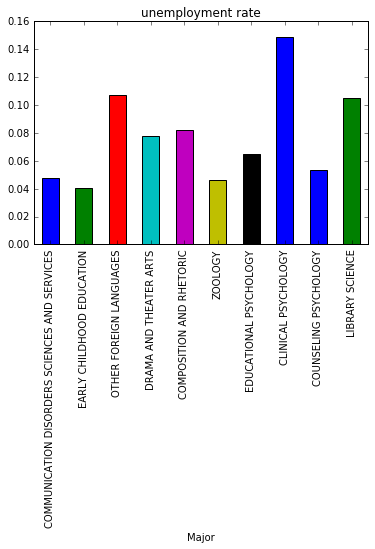

In [62]:
# last 10 majors and their unemployment rate
recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate', legend=None, title='unemployment rate')

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


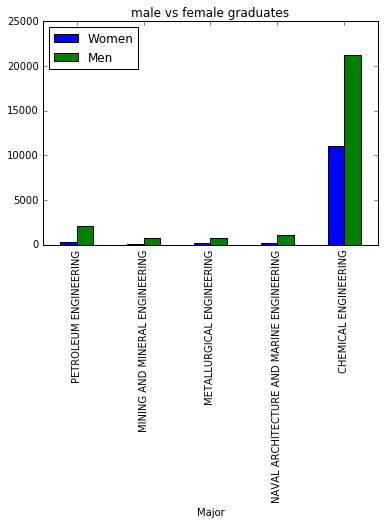

In [66]:
#first five majors comparison men and women
recent_grads[:5].plot.bar(x='Major', y=['Women', 'Men'],
                          title='male vs female graduates')

In just these 5 engineering fields, far greater graduates are male in comparison to female

In [67]:
# just experimenting a way to obtain the same results as above
MenWomen = pd.DataFrame(recent_grads[['Men', 'Women']].values, index=recent_grads['Major'])

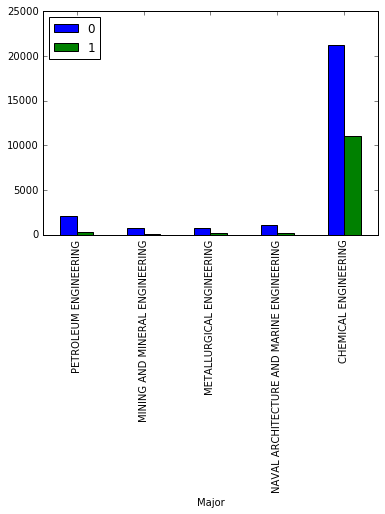

In [68]:
MenWomen[:5].plot.bar()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


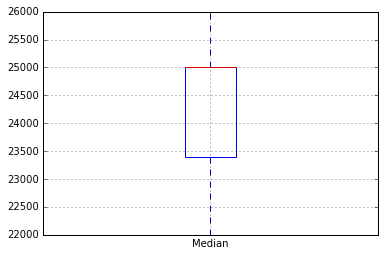

In [73]:
#last 5 majors
#visualizing the median salary for these majors via a boxplot
recent_grads[-5:].boxplot('Median')
recent_grads[-5:]
    
    

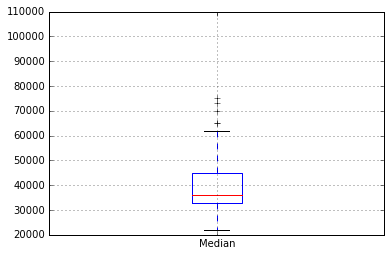

In [75]:
#median salary over all majors
recent_grads.boxplot(column=['Median'])

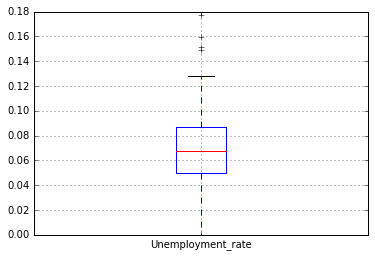

In [77]:
#unemployment rate boxplot 
recent_grads.boxplot(column=['Unemployment_rate'])

In [79]:
#looks right
recent_grads['Unemployment_rate'].describe()

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64

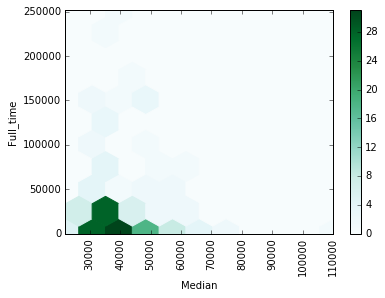

In [80]:
#use a heatmap to get a sense of most common median salary for full time workers across all majors
ax6 = recent_grads.plot.hexbin(x='Median', y='Full_time', gridsize=10,
                              sharex=False, rot=90)

as seen earlier, 30000-40000 is the average salary for full time graduates

In [82]:
#total numbers of male vs female graduates per major
GenderMajor = recent_grads.pivot_table(index='Major', values=['Men','Women'], aggfunc=sum)

In [83]:
GenderMajor

,Men,Women
Major,,
ACCOUNTING,94519.0,104114.0
ACTUARIAL SCIENCE,2110.0,1667.0
ADVERTISING AND PUBLIC RELATIONS,12862.0,40300.0
AEROSPACE ENGINEERING,12953.0,2105.0
AGRICULTURAL ECONOMICS,1749.0,690.0
AGRICULTURE PRODUCTION AND MANAGEMENT,9658.0,4582.0
ANIMAL SCIENCES,5347.0,16226.0
ANTHROPOLOGY AND ARCHEOLOGY,11376.0,27468.0
APPLIED MATHEMATICS,2794.0,2145.0


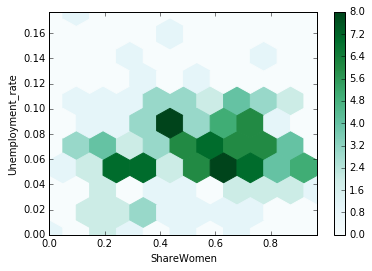

In [84]:
#percentage of women and unemployment rate, heatmap portrays infomation slightly better than histogram used earlier
recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate',
                         gridsize=10, sharex=False)

In [89]:
#pivot by major_category instead of individual major now to obtain total numbers of men
#and women graduates within each 'type' of major

tbl = recent_grads.pivot_table(index='Major_category', 
                               values=['Men','Women'],aggfunc=sum)

In [90]:
tbl

,Men,Women
Major_category,,
Agriculture & Natural Resources,40357.0,35263.0
Arts,134390.0,222740.0
Biology & Life Science,184919.0,268943.0
Business,667852.0,634524.0
Communications & Journalism,131921.0,260680.0
Computers & Mathematics,208725.0,90283.0
Education,103526.0,455603.0
Engineering,408307.0,129276.0
Health,75517.0,387713.0


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


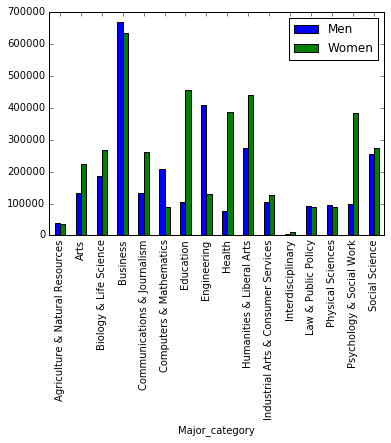

In [91]:
#visualising these total figures
tbl.plot.bar(x=tbl.index, y=['Men', 'Women'])

In [92]:
#another way (For my own benefit) to obtain the above results
reo = recent_grads.groupby('Major_category')

In [93]:
reo['Women', 'Men'].sum()

,Women,Men
Major_category,,
Agriculture & Natural Resources,35263.0,40357.0
Arts,222740.0,134390.0
Biology & Life Science,268943.0,184919.0
Business,634524.0,667852.0
Communications & Journalism,260680.0,131921.0
Computers & Mathematics,90283.0,208725.0
Education,455603.0,103526.0
Engineering,129276.0,408307.0
Health,387713.0,75517.0


In [95]:
op = recent_grads[['Major_category', 'Major', 'Women', 'Men']].groupby('Major_category')

In [96]:
#just making sense of group by, ignore code here
for name_of_the_group, group in op:
   print(name_of_the_group)
   print()
   print(group)

Agriculture & Natural Resources

                      Major_category                                  Major  \
63   Agriculture & Natural Resources  AGRICULTURE PRODUCTION AND MANAGEMENT   
64   Agriculture & Natural Resources                    GENERAL AGRICULTURE   
71   Agriculture & Natural Resources                 AGRICULTURAL ECONOMICS   
107  Agriculture & Natural Resources           NATURAL RESOURCES MANAGEMENT   
111  Agriculture & Natural Resources                               FORESTRY   
112  Agriculture & Natural Resources                           SOIL SCIENCE   
143  Agriculture & Natural Resources             PLANT SCIENCE AND AGRONOMY   
152  Agriculture & Natural Resources                        ANIMAL SCIENCES   
161  Agriculture & Natural Resources              MISCELLANEOUS AGRICULTURE   

       Women     Men  
63    4582.0  9658.0  
64    4346.0  6053.0  
71     690.0  1749.0  
107   5156.0  8617.0  
111    451.0  3156.0  
112    209.0   476.0  
143   2519.0  4

## findings

This has been a nice simple project to get some hands on experience with basic visualisation tools by using them to make sense of the given data. Despite many of the earlier graphs not exactly telling much of a story, the latter plots did reveal interesting details and connections.